In [1]:
import torch
from utils import *
from core import *

device = 'cuda'

In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [3]:
rot = 1
A = torch.load(f'../temp/matrix_200/matrix_rot_{rot}.pt')
A

In [4]:
projections = torch.load('test_data/projections_scaled.pt')
recons_raw = torch.load('test_data/recon_scaled.pt')
recons_raw.shape, projections.shape

(torch.Size([179, 200, 200]), torch.Size([200, 200, 200]))

In [5]:
recons = torch.zeros(200, 200, 200)
recons.shape

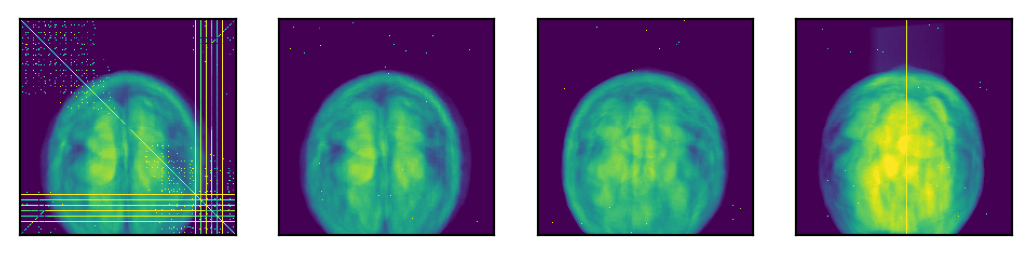

In [13]:
recons[12:191, :, :] = recons_raw

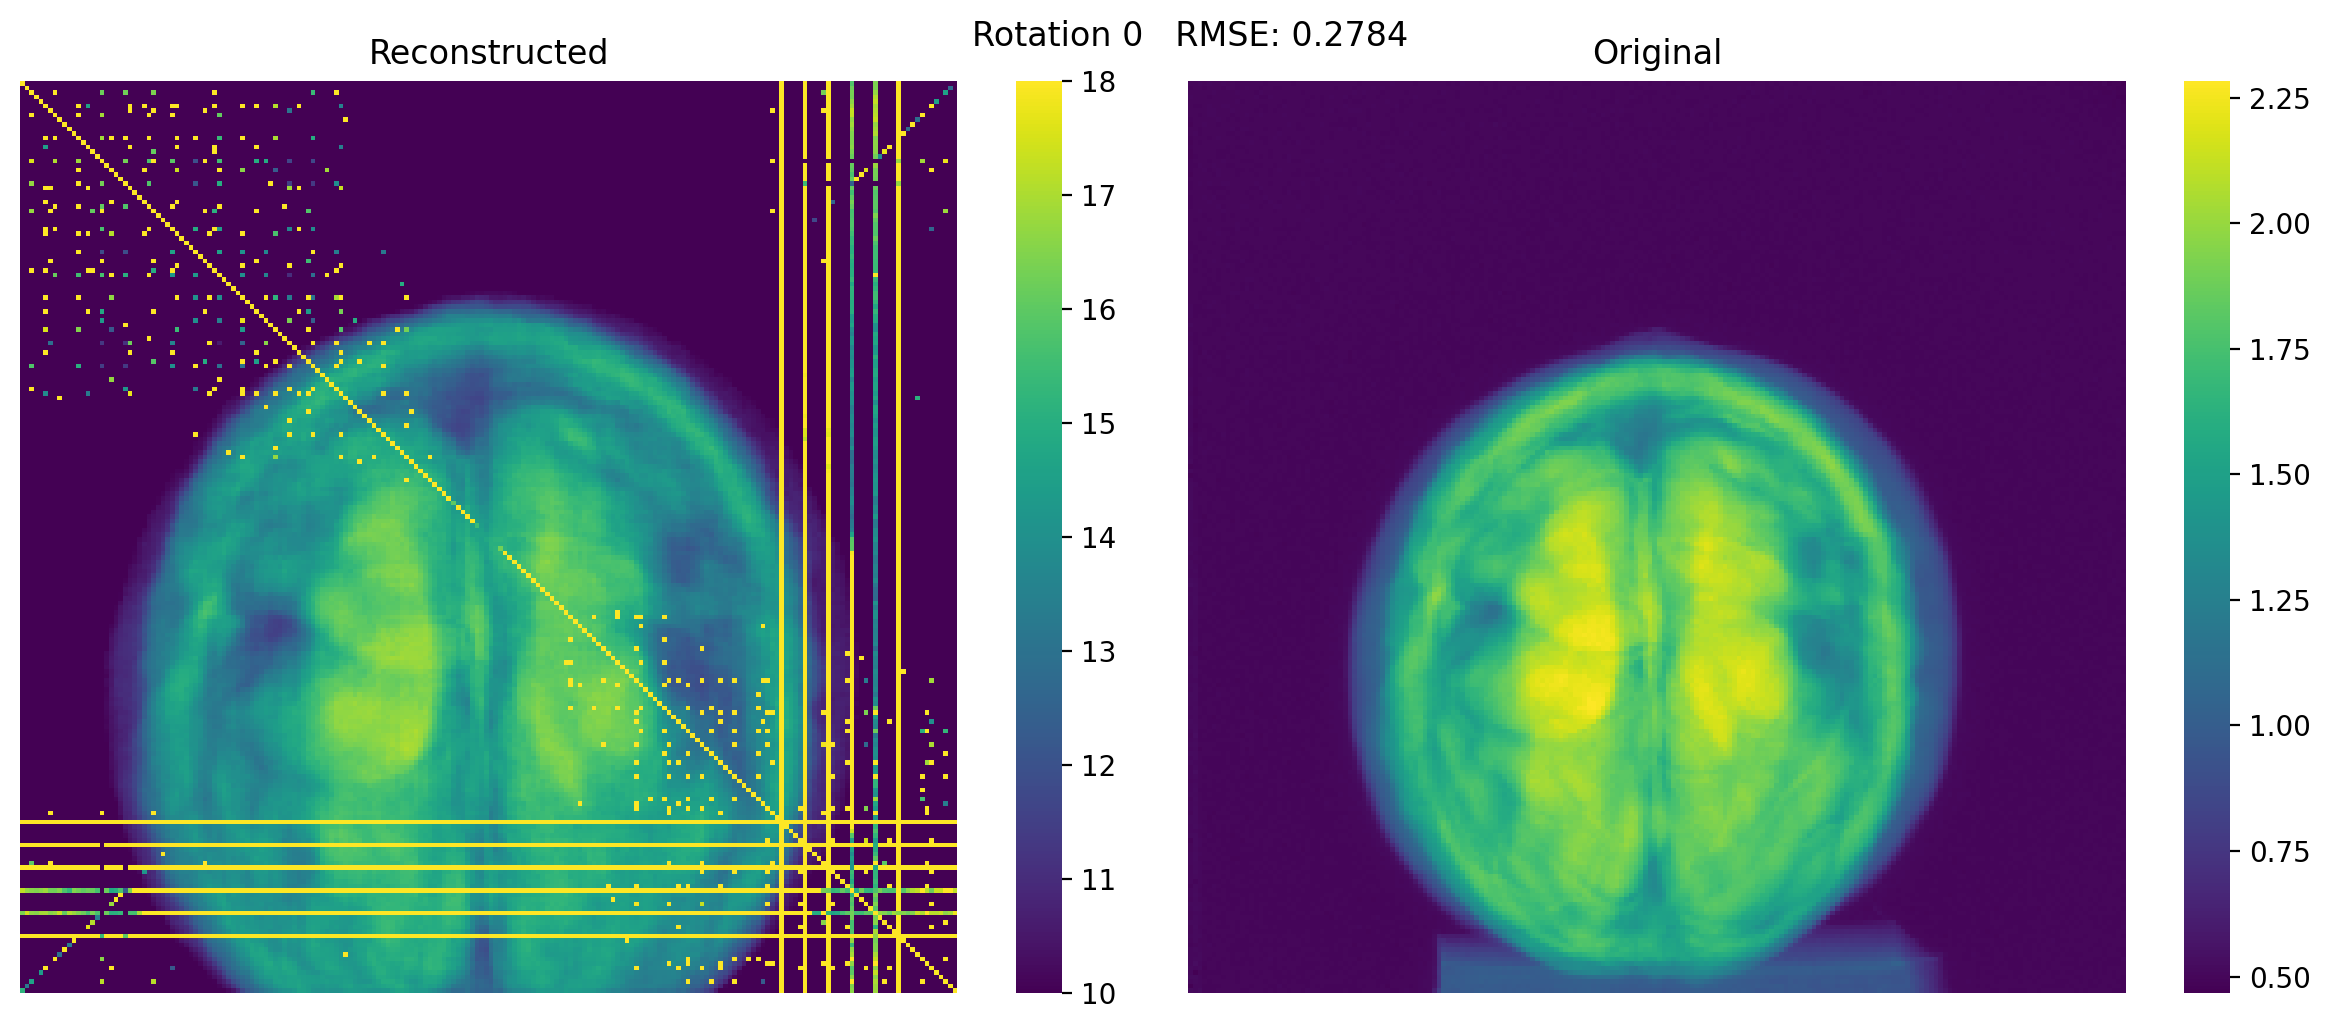

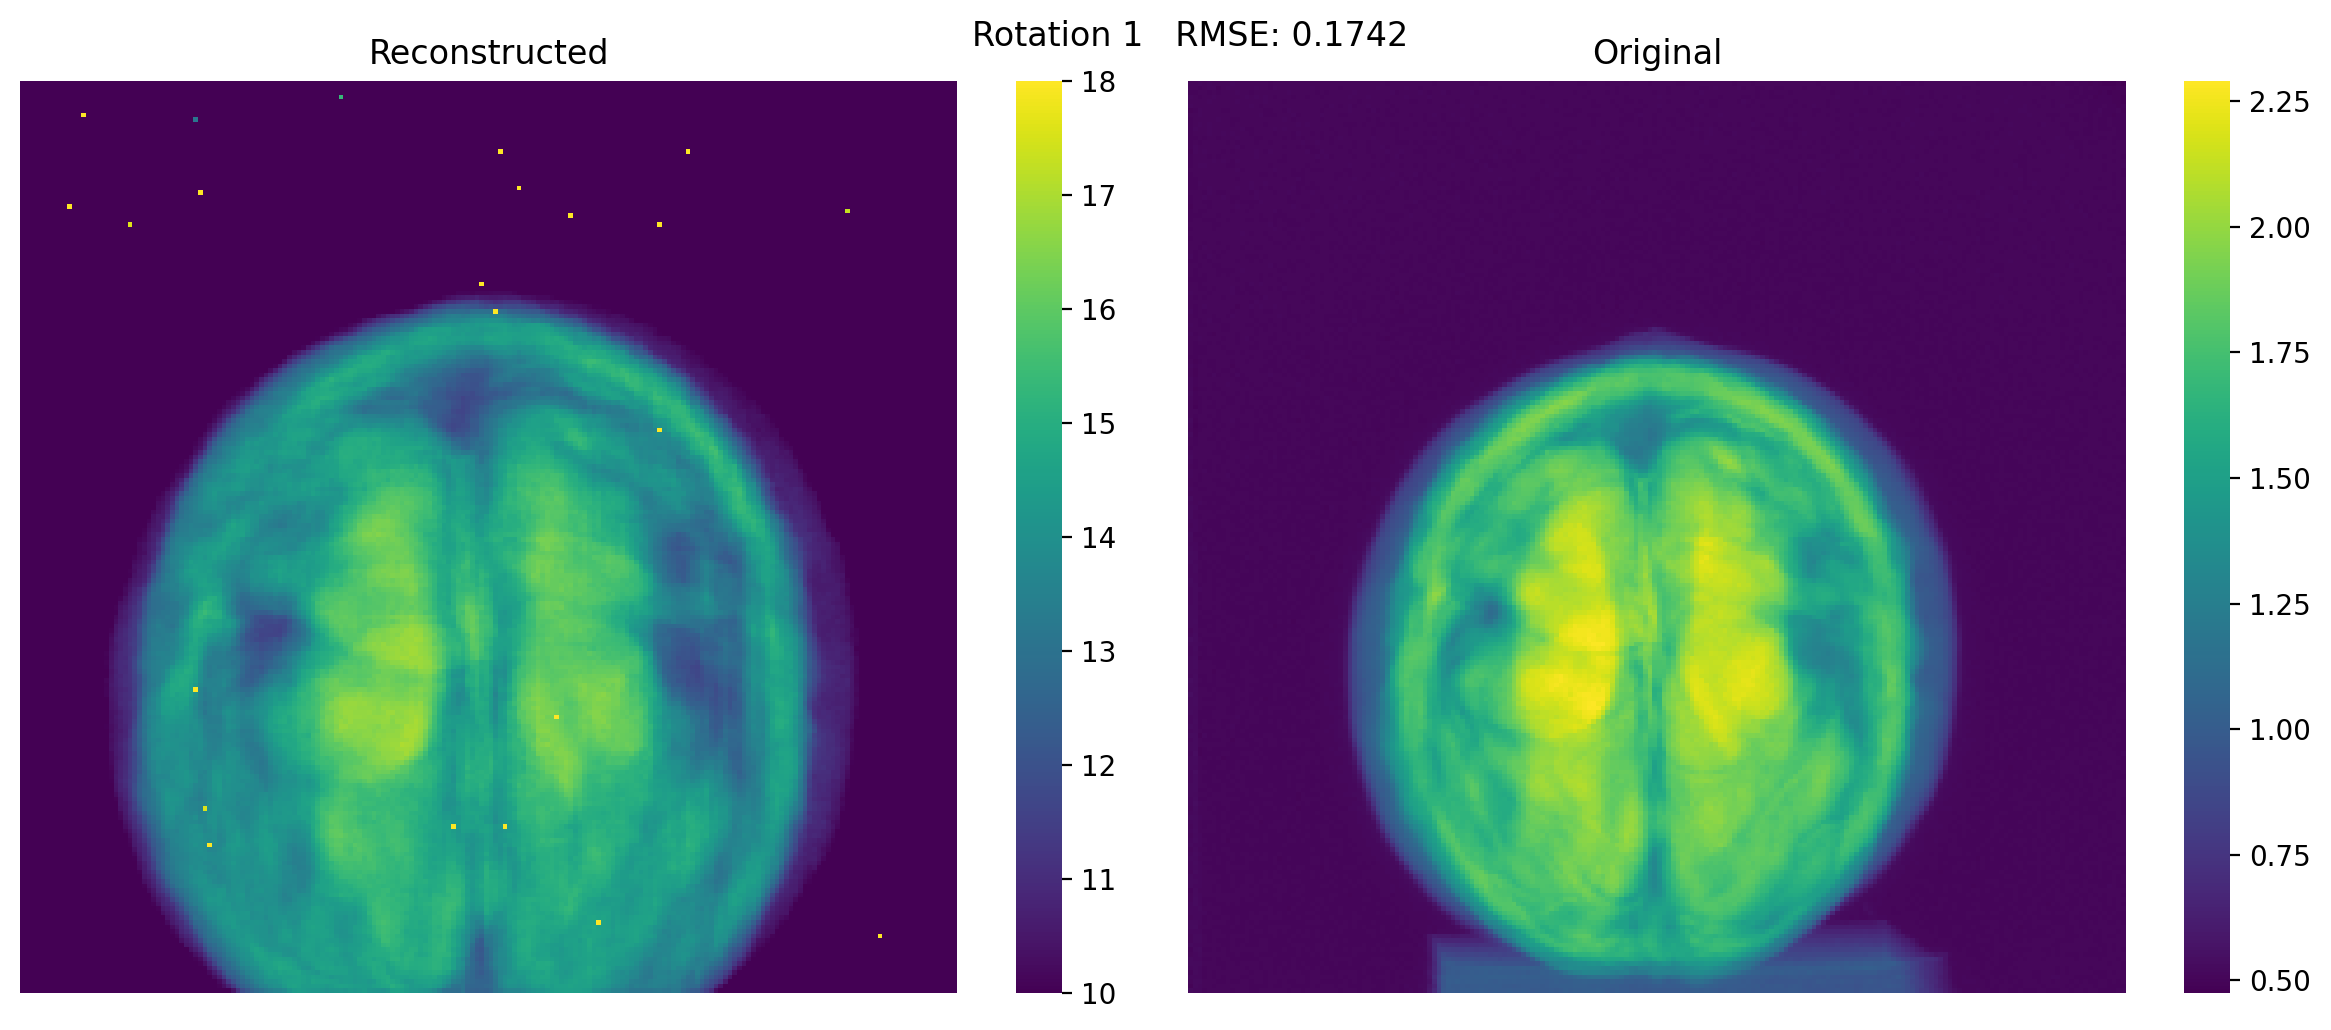

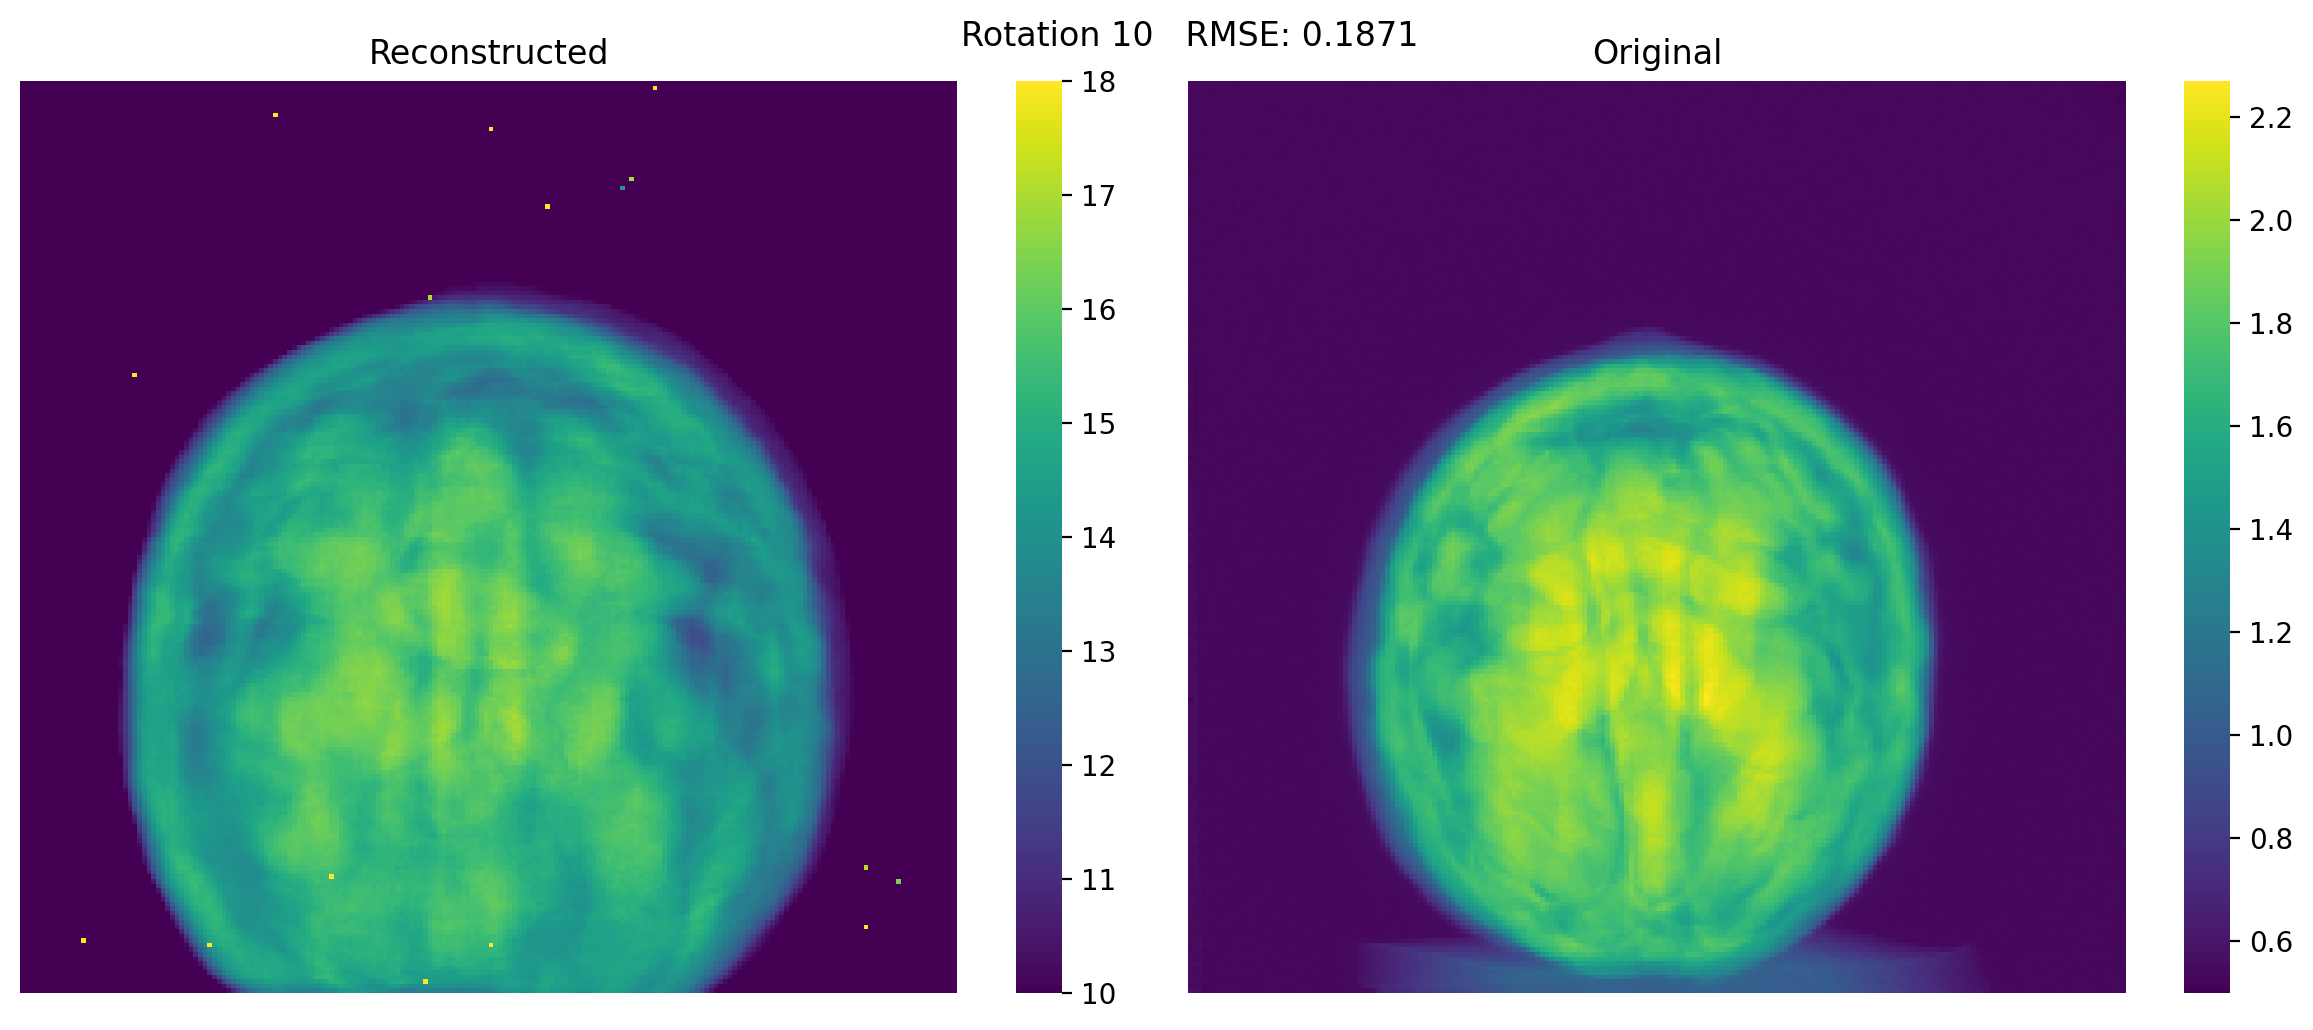

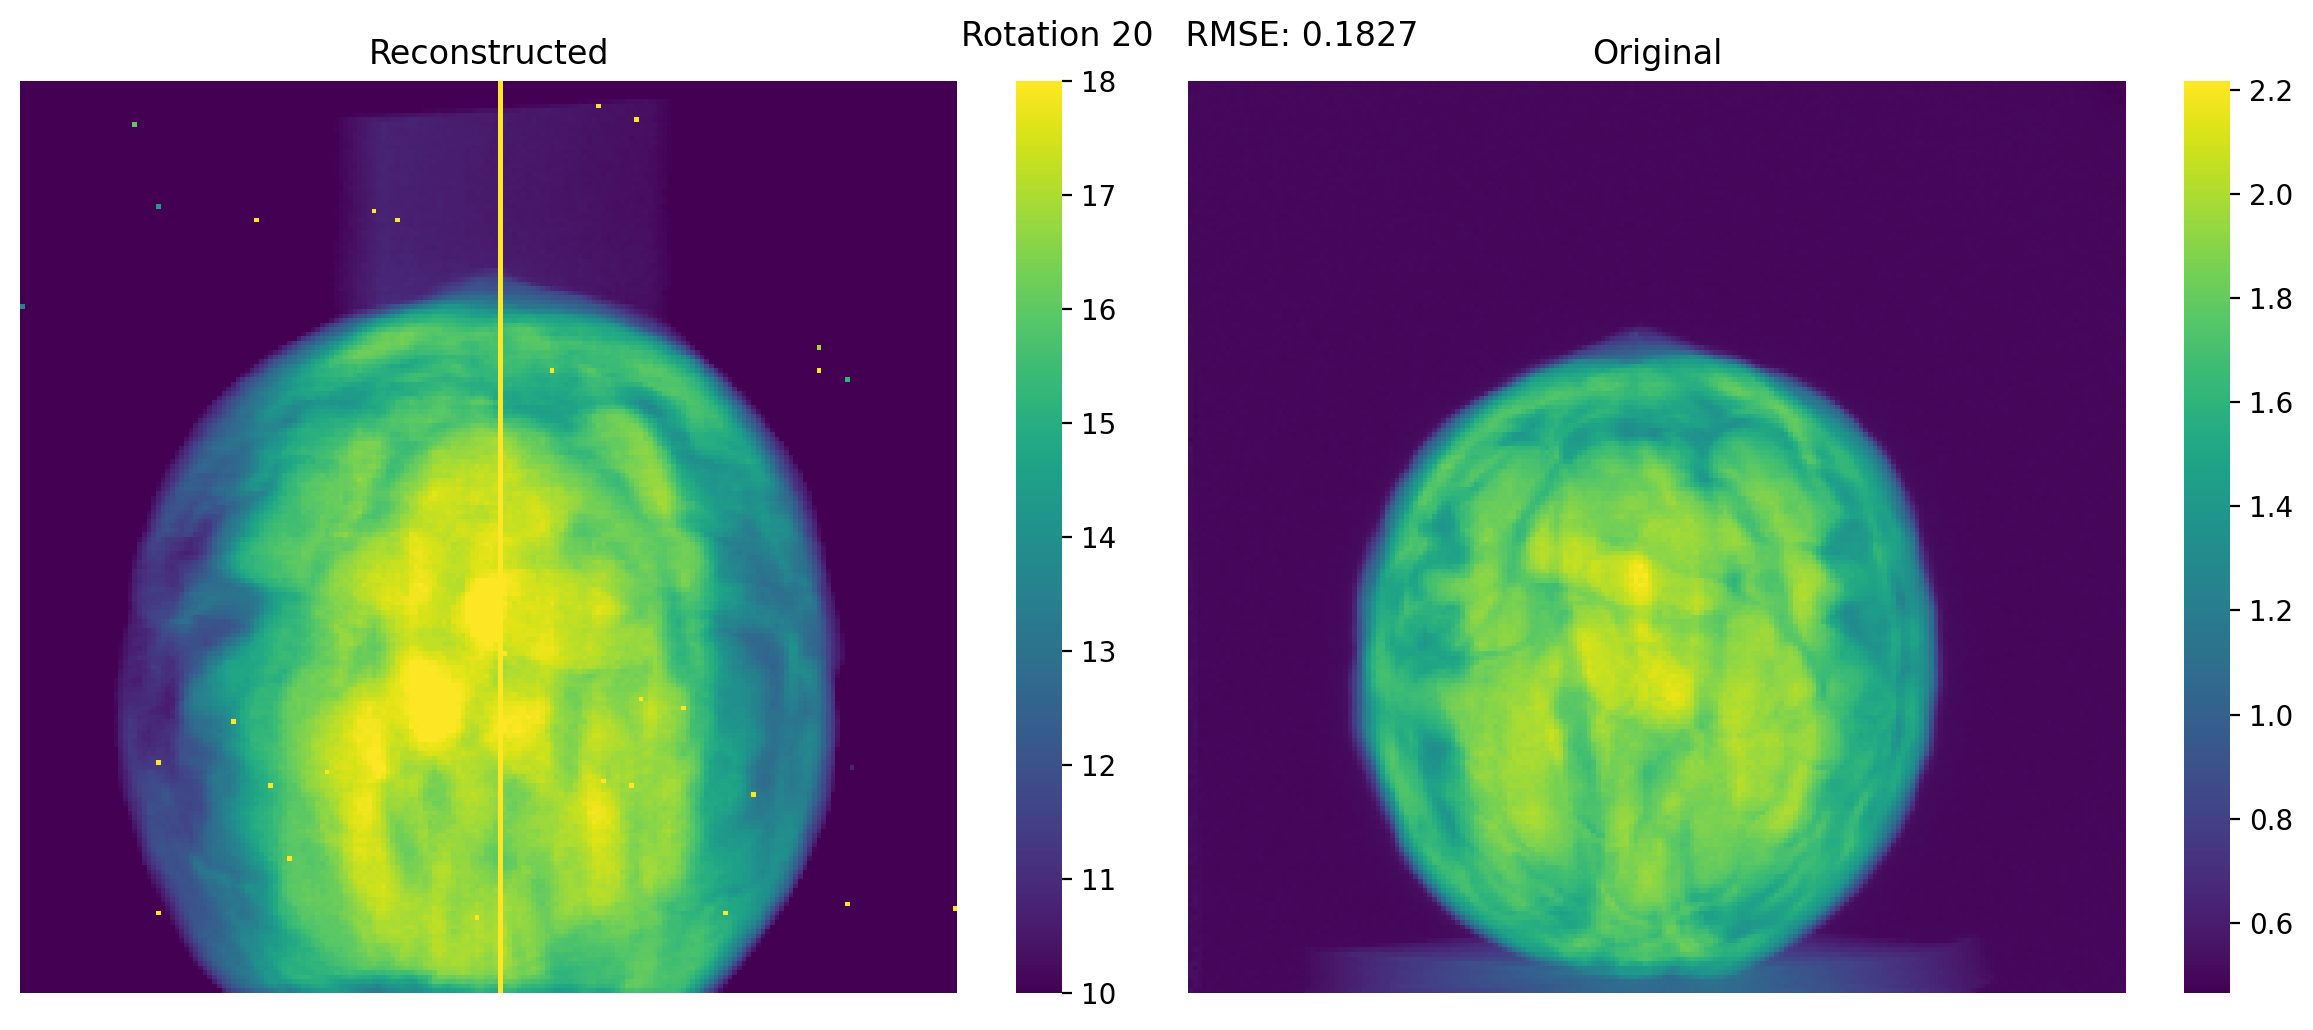

In [16]:
proj = torch.sparse.mm(A, recons.flatten().view(-1, 1))
proj.shape

In [19]:
img = proj.view(200, 200) * 100
img = torch.clip(img, min=10, max=17)

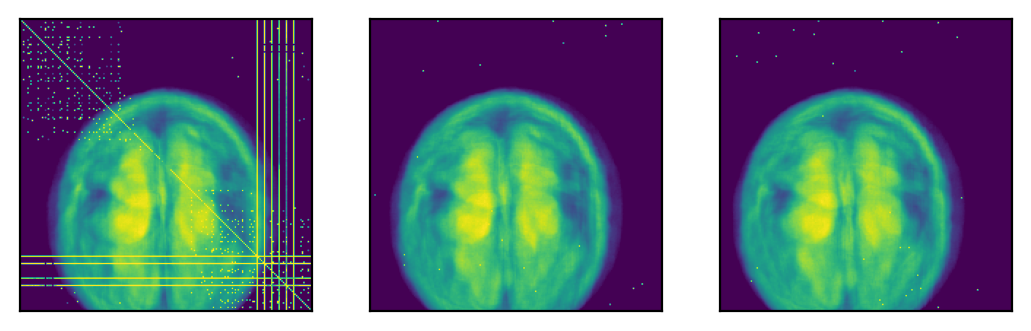

In [20]:
plot_images_line(generate_sinogram(list(range(3)), vol_recon=recons, file_path='../temp/matrix_200/'))

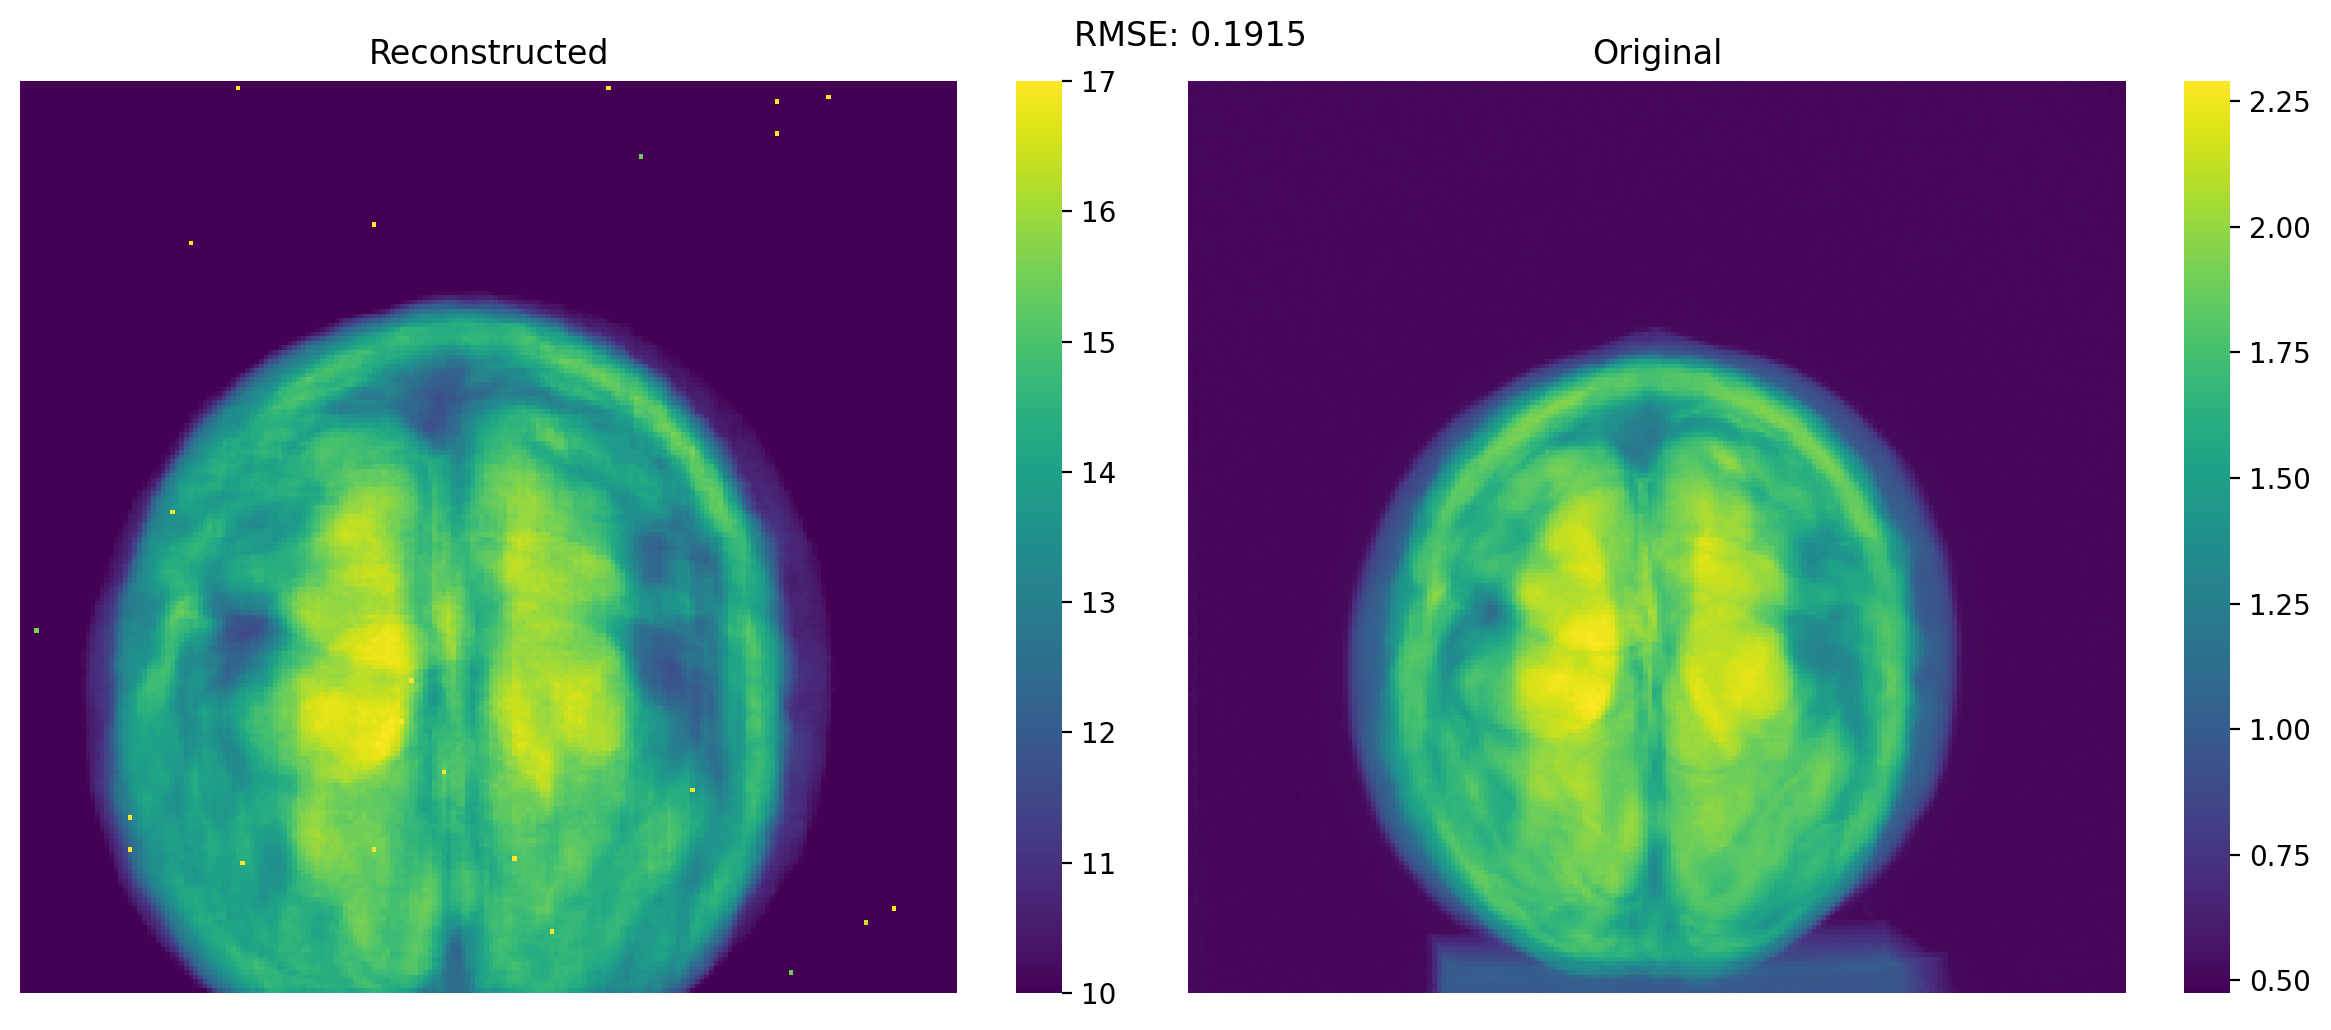

In [21]:
plot_2d_comparison(img, projections[:, :, rot])